# Сборный проект

# Описание проекта

Интернет-магазин **«Стримчик»** продаёт по всему миру компьютерные игры. 
<br> Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 
<br> Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
<br> Имеются в распоряжении данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. 
<br> Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
<br> В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# Описание данных

- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. `Entertainment Software Rating Board`). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию

## Изучение данных

### Открытие файла

In [1]:
# импортируем библиотеки для дальнейшей работы
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from scipy import stats as st
import math
import seaborn as sns

In [2]:
# откроем файл с данными
games = pd.read_csv('/datasets/games.csv')

### Изучение данных

Изучим общую информацию

In [3]:
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
games.tail(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16705,15 Days,PC,2009.0,Adventure,0.00,0.01,0.00,0.0,63.0,5.8,NaN
16706,Men in Black II: Alien Escape,GC,2003.0,Shooter,0.01,0.00,0.00,0.0,NaN,tbd,T
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.0,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [5]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [6]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [7]:
# проверим, сколько есть пропусков в данных и отсортируем их по возрастанию
games.isna().sum().sort_values()

Platform              0
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Name                  2
Genre                 2
Year_of_Release     269
User_Score         6701
Rating             6766
Critic_Score       8578
dtype: int64

In [8]:
# посчитаем пропуски в процентах от всех записей
games.isna().mean().sort_values().round(4)*100

Platform            0.00
NA_sales            0.00
EU_sales            0.00
JP_sales            0.00
Other_sales         0.00
Name                0.01
Genre               0.01
Year_of_Release     1.61
User_Score         40.09
Rating             40.48
Critic_Score       51.32
dtype: float64

### Вывод
в данных видим следующее:
- в названии столбцов присутствуют разные регистры написания, требуется привести все названия к нижнему регистру
- всего записей 16715, есть пропуски данных (от 2 до 51% по столбцам с годом выпуска, оценкой пользователей, рейтингом и оценкой критиков), их нужно будет рассмотреть далее. Две записи с пропущенным именем лучше удалить, т.к. ценности они не несут и они не окажут влияние на общий анализ
- типы данных в столбцах `Year_of_Release` и `Critic_Score` (т.к. в данных не встречается рейтинг с десятичными значениями) лучше привести к целочисленным (тип `int`)
- тип данных столбца `User_Score` привести к типу `float`

## Подготовка данных

### Стиль заголовков

Исправим названия столбцов

In [9]:
games.columns # выведем перечень столбцов для наглядности

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [10]:
# приведем столбцы к нижнему регистру
games.columns = games.columns.str.lower()

In [11]:
games.columns # проверим изменения

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Замена типа данных и обработка пропусков

In [12]:
# удалим две строки с пропущенными значениями названия
games.dropna(subset=['name'], inplace=True)

In [13]:
# посмотрим уникальные значения столбца с оценкой критиков
games['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [15]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null float64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [16]:
# заполним пропущенные значения с рейтингом
games['rating'] = games['rating'].fillna('no rating')

In [17]:
# посмотрим уникальные значения столбца с оценкой пользователей
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В данных есть:
- пропущенные значения `nan` - записи не определены
- игры с нулевым рейтингом
- игры со значением `tbd` - возможно, сокращение от `to be discussed`. По своей сути - это тоже неопределенные записи
Пропуски данных оставим без заполнения, т.к. нулем их заменять нельзя.

In [18]:
# преобразуем значения tbd в nan
games.loc[games['user_score'] == 'tbd','user_score'] = np.nan

In [19]:
games['user_score'] = games['user_score'].astype('float')

In [20]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null float64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             16713 non-null object
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


In [21]:
games.isna().sum().sort_values()

name                  0
platform              0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
rating                0
year_of_release     269
critic_score       8576
user_score         9123
dtype: int64

In [22]:
# проверим данные на наличие дубликатов
print('Количество дубликатов:', games.duplicated().sum())

Количество дубликатов: 0


Основные пропуски заполлнили, типы данных преобразовали к нужным форматам, дубликатов не обнаружили

### Суммарные продажи

Посчитаем суммарные продажи во всех регионах, добавим расчет в новый столбец

In [23]:
# добавим столбец с общей выручкой по всем регионам
games['total_sales'] = games.loc[:, 'na_sales':'other_sales'].sum(axis=1)

In [24]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no rating,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no rating,31.38


### Вывод

В ходе подготовки данных сделали следующее:
- скорректировали стиль заголовоков столбцов, приведя названия к нижнему регистру
- удалили две строки с неизвестным названием игр
- заменили тип данных столбца `User_Score` на float (заменив значения tbd на неопределенное nan)
- добавили столбец с суммой продаж по всем регионам

<br> Данные готовы для дальнейшего анализа.

## Исследовательский анализ данных

**Задание:**
1. Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
2. Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
Не учитывайте в работе данные за предыдущие годы.
Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
3. Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
Соотнесите выводы с продажами игр на других платформах.
4. Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

### Статистика выпуска игр по годам

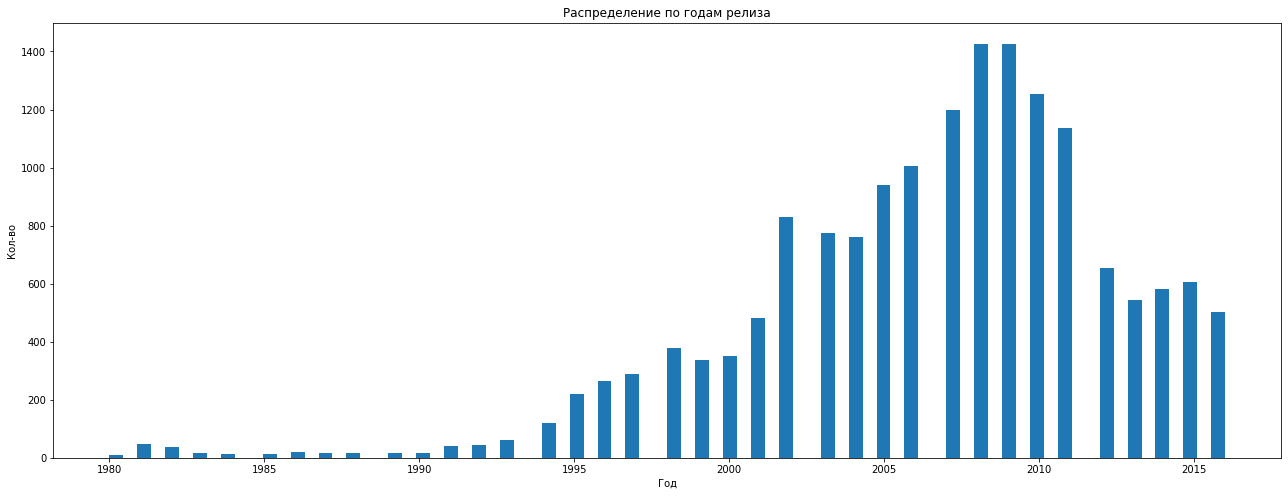

In [25]:
# построим гистограмму, отбросив нулевые значения, где были пропуски данных
games[games['year_of_release'] != 0]['year_of_release'].plot(kind='hist', bins=80, figsize=(22,8))
plt.title('Распределение по годам релиза')
plt.xlabel('Год')
plt.ylabel('Кол-во');

Глядя на график, видим, что рост выпуска игр начался после 1994 года и продолжался до 2009, после чего наблюдается сжатие рынка в два раза до уровня выпуска примерно 600 игр в год.
<br> данные до 1994 можно отбросить, т.к. выпуск игр незначителен и не окажет влияния на целостную картину

### Продажи по платформам

In [26]:
# сгруппируем данные по продажам на различных платформах
games.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(
    'total_sales', ascending = False)

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


In [27]:
games[games['year_of_release'] == 2016]['total_sales'].sum().round(0)

130.0

In [28]:
games[games['year_of_release'] == 2008]['total_sales'].sum().round(0)

672.0

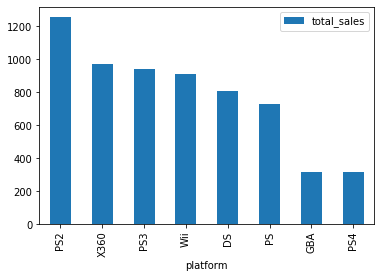

In [29]:
#выберем ТОП платформ с наибольшими продажами и построим по ним график
top_platform = games.pivot_table(index='platform', values='total_sales', aggfunc='sum').nlargest(8, 'total_sales')
top_platform.plot(kind='bar');


Лидером по продажам является PS2

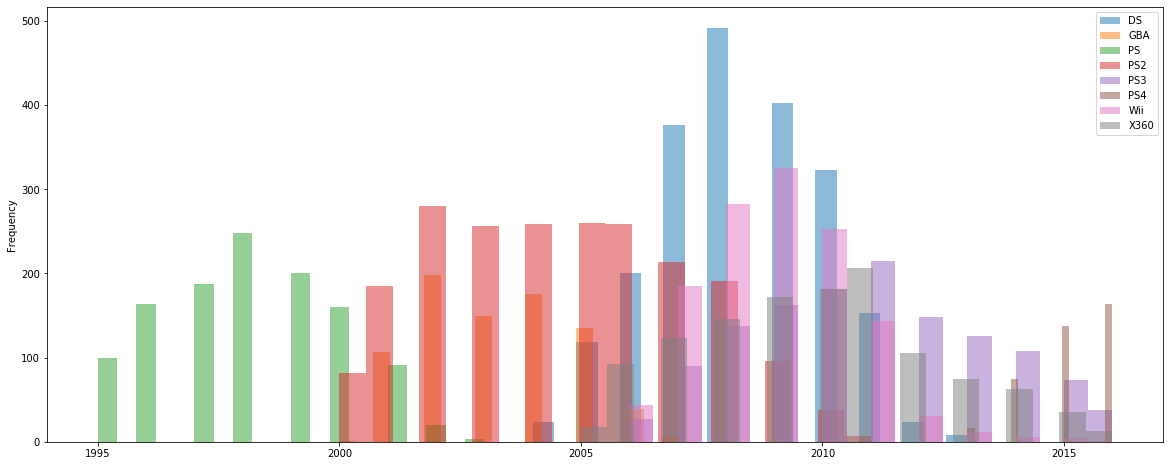

In [30]:
top_platform = games[(games['year_of_release'] != 0) & (games['year_of_release'] > 1994)
      & (games['platform'].isin(('PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA','PS4')))]

top_platform.groupby('platform')['year_of_release'].plot.hist(alpha=0.5, legend=True, bins=20, figsize=(20,8));


Посмотрим отдельно семейство платформ 'PS'

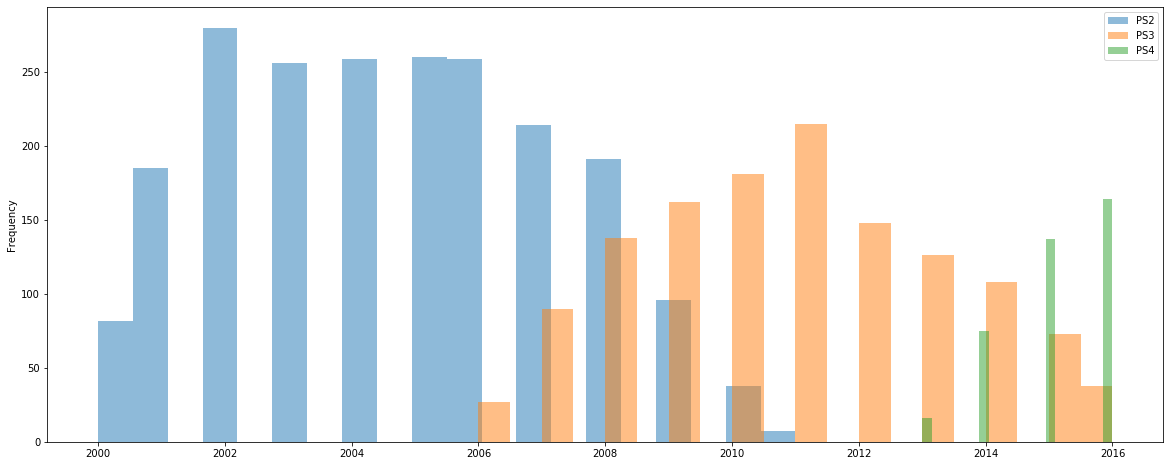

In [31]:
top_platform_ps = games[(games['year_of_release'] != 0) & (games['year_of_release'] > 1994)
      & (games['platform'].isin(('PS2','PS3', 'PS4')))]

top_platform_ps.groupby('platform')['year_of_release'].plot.hist(
    alpha=0.5, legend=True, bins=20, figsize=(20,8));


На графике отчетливо видно, что следующая серия платформы заменяет предыдущую в моменте начала падения продаж с целью сохранения рынка и возобновления спроса на новую модель.

In [32]:
# построим сводную таблицу по аналогичным условиям как график
group_data = games[(games['year_of_release'] > 2000)].pivot_table(index='year_of_release', 
                         columns = 'platform', values='total_sales', aggfunc='sum')
group_data.fillna(0, inplace=True)
group_data

platform,3DS,DC,DS,GB,GBA,GC,N64,PC,PS,PS2,PS3,PS4,PSP,PSV,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,
2001.0,0.00,1.07,0.00,9.24,61.53,26.34,3.25,5.47,35.59,166.43,0.00,0.00,0.00,0.00,0.28,0.00,0.00,0.00,22.26,0.00
2002.0,0.00,0.29,0.00,0.00,74.16,51.81,0.08,8.57,6.67,205.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,48.01,0.00
2003.0,0.00,0.00,0.00,0.00,56.67,50.61,0.00,8.84,2.07,184.31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,55.04,0.00
2004.0,0.00,0.00,17.27,0.00,77.91,28.82,0.00,10.39,0.00,211.81,0.00,0.00,7.06,0.00,0.00,0.00,0.00,0.00,65.42,0.00
2005.0,0.00,0.00,130.14,0.00,33.86,27.62,0.00,4.37,0.00,160.66,0.00,0.00,43.84,0.00,0.00,0.00,0.00,8.25,49.08,0.00
2006.0,0.00,0.00,119.81,0.00,5.28,11.26,0.00,2.85,0.00,103.42,20.96,0.00,55.32,0.00,0.00,137.15,0.00,51.62,10.04,0.00
2007.0,0.00,0.02,146.94,0.00,3.40,0.27,0.00,9.28,0.00,75.99,73.19,0.00,46.93,0.00,0.00,152.77,0.00,95.41,0.55,0.00
2008.0,0.00,0.04,145.31,0.00,0.00,0.00,0.00,12.42,0.00,53.90,118.52,0.00,34.55,0.00,0.00,171.32,0.00,135.26,0.18,0.00
2009.0,0.00,0.00,119.54,0.00,0.00,0.00,0.00,16.91,0.00,26.40,130.93,0.00,37.78,0.00,0.00,206.97,0.00,120.29,0.00,0.00


По графику и сводной таблице видно:
- средний срок жизни платформы - 10 лет. 
- лидером среди продаж является Sony Play Station, потом идет Xbox 
- максимальные продажи наблюдаются через 4-5 лет после выхода приставки на рынок
- у Nintento WII (DS) был быстрый скачок в 2006 году и такой же резкий провал c 2010 года
- продажи по всем выделенным платформам падают по уровню 2016 года

In [33]:
sales_time = games[(games['platform'] != 'PC') & (games['platform'] != 'PS4') &
                  (games['platform'] != 'XOne') &
                  (games['platform'] != 'WiiU') &
                  (games['platform'] != '3DS')
                  ].groupby(['platform', 'year_of_release']
                           ).agg({ 'total_sales' : 'sum'}).reset_index()
sales_time['platform'].value_counts().head(15)

GB      13
PS2     12
X360    12
NES     12
PSP     12
Wii     11
PS3     11
DS      11
2600    10
PS      10
SNES    10
XB       9
GBA      8
GC       7
N64      7
Name: platform, dtype: int64

In [34]:
sales_time['platform'].value_counts().mean().round(0)


7.0

In [35]:
# сделаем срез по продажам на различных платформах с 2013 года
platform_from_2013 = games[(games['year_of_release'] > 2012)].pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum')
platform_from_2013.fillna(0, inplace=True)
platform_from_2013


platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013.0,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014.0,43.76,0.00,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015.0,27.78,0.00,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016.0,15.14,0.00,5.25,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


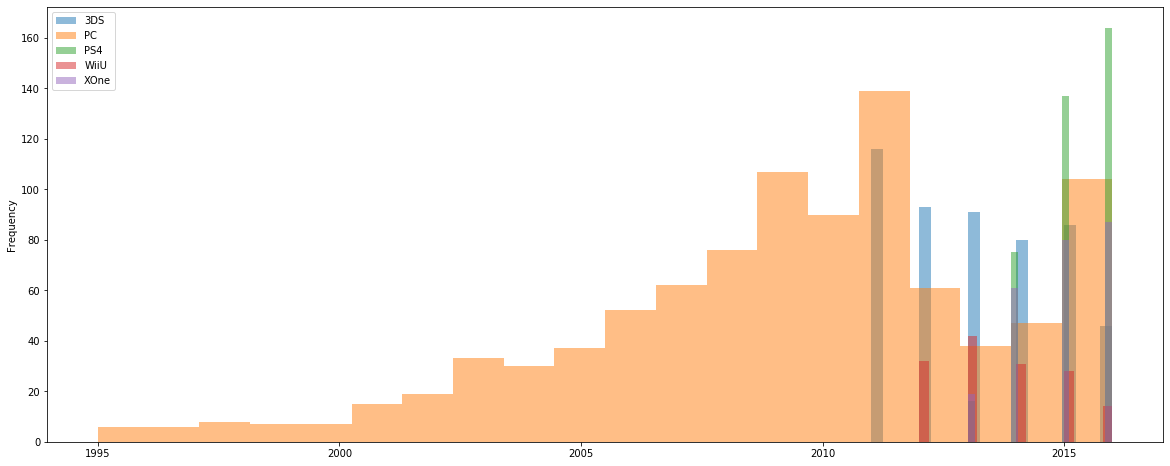

In [36]:
top_platform_new = games[(games['year_of_release'] != 0) & (games['year_of_release'] > 1994)
      & (games['platform'].isin(('PS4', 'XOne', 'PC', 'WiiU','3DS')))]

top_platform_new.groupby('platform')['year_of_release'].plot.hist(alpha=0.5, legend=True, bins=20, figsize=(20,8));


Ниже построим график "ящик с усами" по глобальным продажам игр в разбивке по платформам

In [37]:
top_platform_new['total_sales'].describe()

count    2242.000000
mean        0.469781
std         1.158486
min         0.010000
25%         0.030000
50%         0.100000
75%         0.370000
max        14.630000
Name: total_sales, dtype: float64

In [38]:
# отбросим выбивающиеся значения, ограничив их величиной стандартного отклонения
top_platform_new = top_platform_new[top_platform_new['total_sales'] < 1.5]

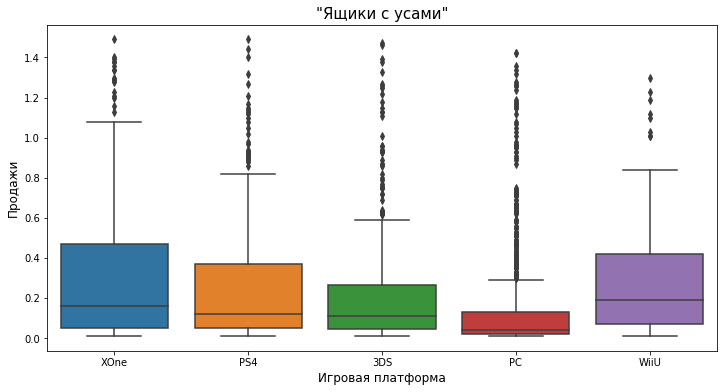

In [39]:
# построим графики
plt.figure(figsize=(12,6))
sns.boxplot(data=top_platform_new, x='platform', y='total_sales')
plt.title('"Ящики с усами"', fontsize=15)
plt.xlabel('Игровая платформа', fontsize=12)
plt.ylabel('Продажи',fontsize=12);

По графикам видим подверждение предыдущим выводам:
- наибольшие средние продажи у платформ: Xone и WiiU, PS4 и 3DS несколько проигрывают им
- наименьшие средние продажи у PC, имеющая свою постоянную нишу на рынке (за счет дешевизны игр в сравнении с приставками), хоть и не такую значительную по объемам продаж

### Зависимость продаж от отзывов пользователей и критиков

Корреляция между отзывами и продажами = 0.12669133936341712 - слабая
Корреляция между отзывами и продажами = 0.4324315685642061 - средняя


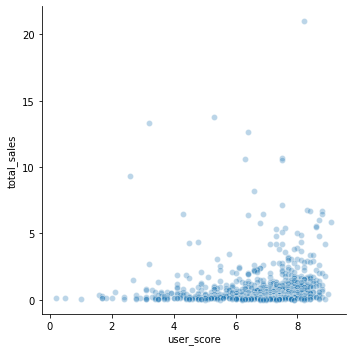

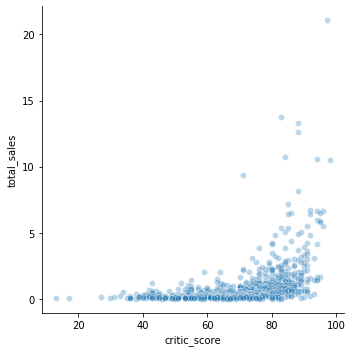

In [40]:
# Найдем корреляцию между оценками пользователей и критиками и продажами по PS3
ps3 = games[(games['platform']=='PS3') & (games['user_score'] != 0) & (games['critic_score'] != 0)]
for column in ['user_score', 'critic_score']:
    corr = ps3[column].corr(ps3['total_sales'])
    if corr <= 0.3:
        print('Корреляция между отзывами и продажами =', corr, '- слабая')
    if corr >=0.5:
        print('Корреляция между отзывами и продажами =', corr, '- высокая')
    if 0.3<= corr <= 0.5:
        print('Корреляция между отзывами и продажами =', corr, '- средняя')
    sns.relplot(x=column, y="total_sales", data=ps3, alpha=0.3);

Корреляция продаж с отзывами критиков выше и показывает зависимость продаж от этих отзывов (чем выше оценки оценки критиков, теб больше продажи). Отзывы пользователей влияют не значительно на объемы продаж

Посмотрим совпадают ли эти выводы по другим платформам

PS2
Коэффициент корреляции: 0.17
Коэффициент корреляции: 0.4
X360
Коэффициент корреляции: 0.11
Коэффициент корреляции: 0.39
PS3
Коэффициент корреляции: 0.13
Коэффициент корреляции: 0.43
Wii
Коэффициент корреляции: 0.11
Коэффициент корреляции: 0.18
DS
Коэффициент корреляции: 0.13
Коэффициент корреляции: 0.24
PS
Коэффициент корреляции: 0.3
Коэффициент корреляции: 0.45
GBA
Коэффициент корреляции: 0.1
Коэффициент корреляции: 0.24
PS4
Коэффициент корреляции: -0.03
Коэффициент корреляции: 0.41


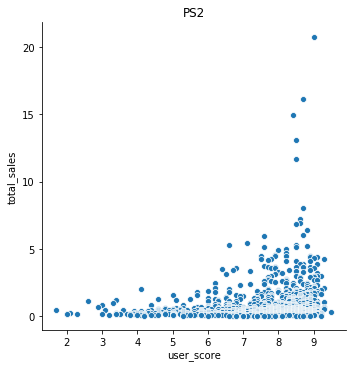

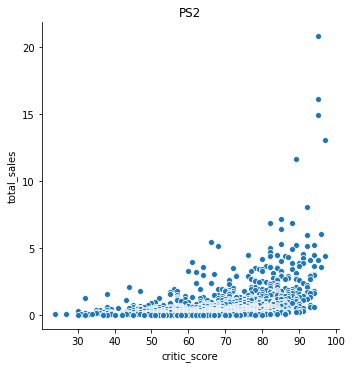

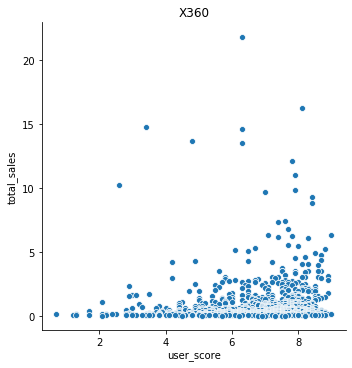

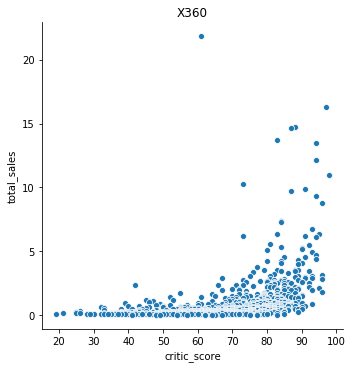

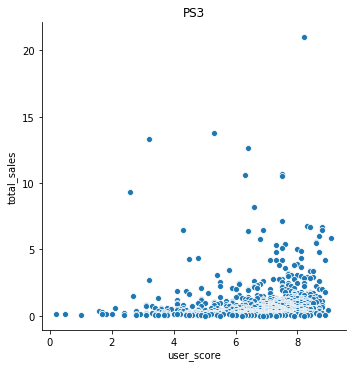

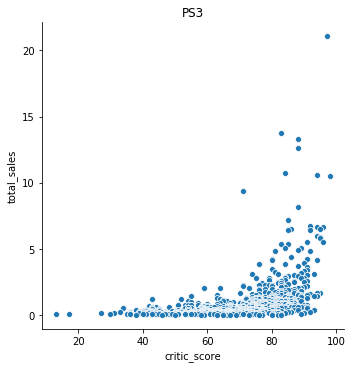

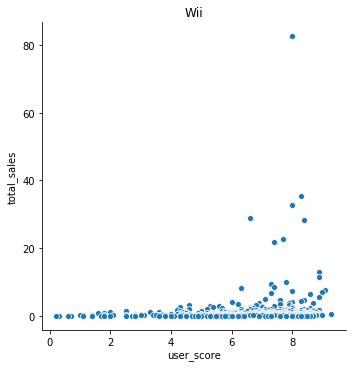

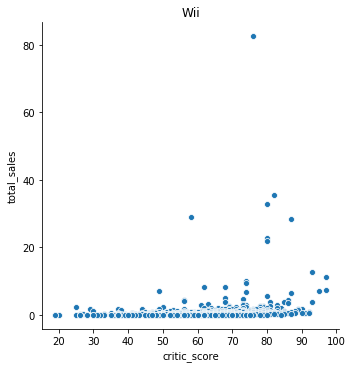

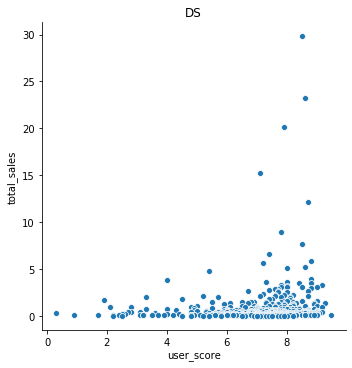

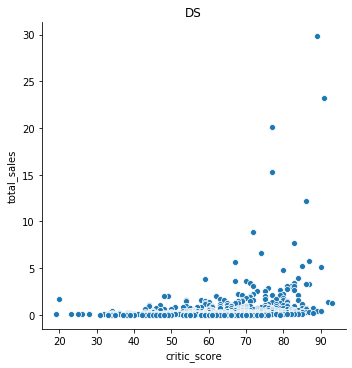

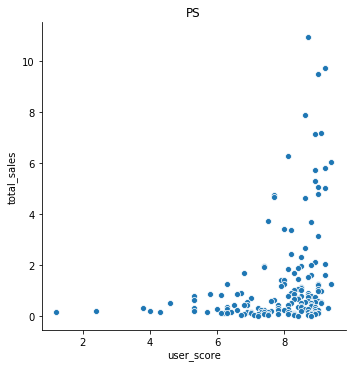

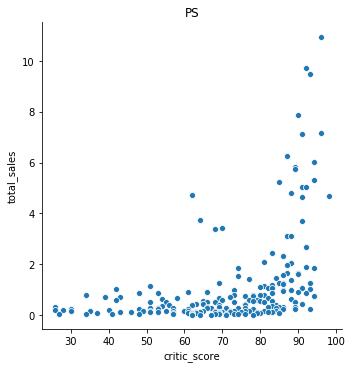

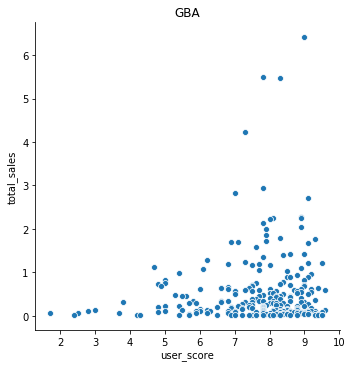

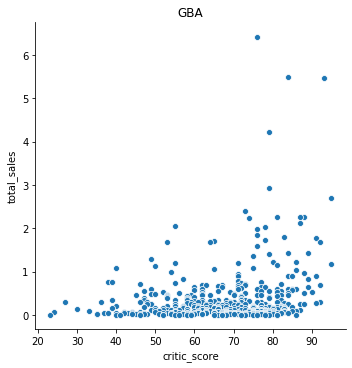

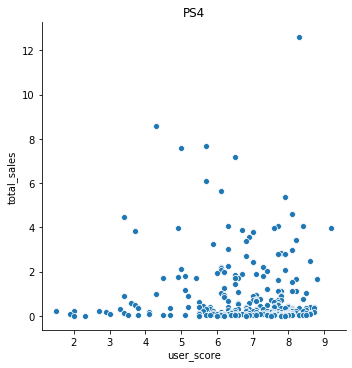

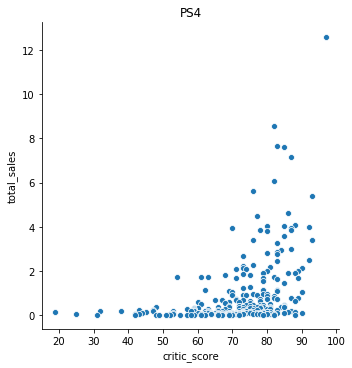

In [41]:
for platform in ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA','PS4']:
    print(platform)
    for column in ['user_score', 'critic_score']:
        temp = games[(games['platform'] == platform) & (games['user_score'] != 0) & (games['critic_score'] != 0)]
        print('Коэффициент корреляции:', temp[column].corr(temp['total_sales']).round(2))
        sns.relplot(x=column, y="total_sales", data=temp)
        _ = plt.title(platform)
        

Выводы совпали как и по PS2. 
<br> Соответственно, для всех платформ характерно `среднее` влияние отзывов критиков на продажи и незначительное или полное отсутствие влияния отзывов пользователей.

### Анализ жанров

Проанализируем распределение продаж по жанрам игр

In [42]:
genre_sales = games.pivot_table(index='genre', values='total_sales', 
                                aggfunc=['sum','count','mean'])
genre_sales.columns = ['sum','count', 'mean']
genre_sales.sort_values('sum', ascending=False)

,sum,count,mean
genre,,,
Action,1744.17,3369,0.517711
Sports,1331.27,2348,0.566980
Shooter,1052.45,1323,0.795503
Role-Playing,934.56,1498,0.623872
Platform,827.77,888,0.932173
Misc,802.51,1750,0.458577
Racing,728.67,1249,0.583403
Fighting,447.53,849,0.527126
Simulation,389.97,873,0.446701


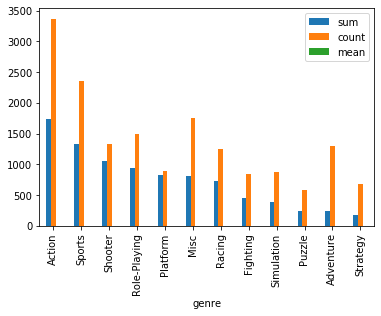

In [43]:
# построим график распределения для наглядности
genre_sales.sort_values('sum', ascending=False).plot(kind='bar');

Выше всего продажи у жанра Action. Стратегии продаются всех хуже.

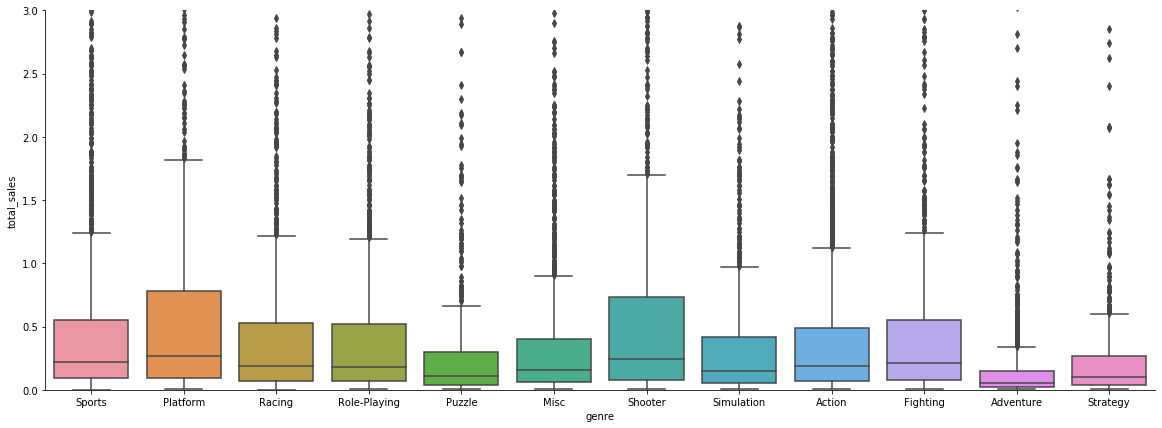

In [44]:
sns.catplot(x='genre', y="total_sales", kind="box", data=games, height=6, aspect=2.7)
_ = plt.ylim(0, 3)

Однако, наиболее прибыльными жанрами являются "Платформы" и "Шутеры"

### Вывод

При исследовательском анализе мы определили:
- выделили ТОП10 наиболее продаваемых платформ с 1994 по 2016: PS2, X360, PS3, Wii, DS, PS, GBA,PS4
- самой продаваемой платформой с 1994 по 2016 год стала PS2, однако наиболее доходной - PS3. На втором месте по обоим показателям идет X360
- сделали вывод, что на продажи платформ влияют отзывы критиков, отзывы пользователей влияние не оказывают
- наиболее продаваемыми жанрами игр являются Экшн и Спортивные, самыми прибыльными на единицу проданной копии стали "Платформы" и "Шутеры"

## Портрет пользователя по регионам

Определим для пользователя каждого региона (NA, EU, JP):
- самые популярные платформы (топ-5). Опишем различия в долях продаж.
- самые популярные жанры (топ-5). Поясним разницу.
- влияет ли рейтинг ESRB на продажи в отдельном регионе?

### ТОП-5 платформ по регионам

,na_sales,ratio
platform,,
X360,602.47,24.0
PS2,583.84,24.0
Wii,496.90,20.0
PS3,393.49,16.0
DS,382.40,16.0


,eu_sales,ratio
platform,,
PS2,339.29,24.0
PS3,330.29,23.0
X360,270.76,19.0
Wii,262.21,19.0
PS,213.61,15.0


,jp_sales,ratio
platform,,
DS,175.57,26.0
PS,139.82,21.0
PS2,139.20,21.0
SNES,116.55,17.0
3DS,100.67,15.0


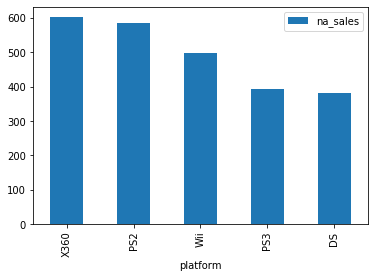

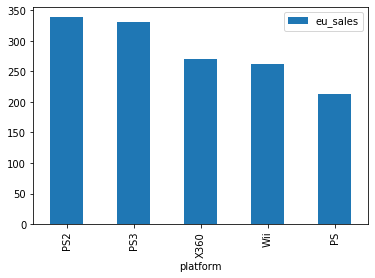

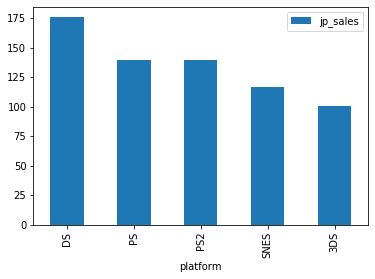

In [45]:
#выберем ТОП5 платформ с наибольшими продажами по регионам и построим по ним графики
columns_list = ['na_sales', 'eu_sales', 'jp_sales']
for col in columns_list:
    top_platform = games.pivot_table(index='platform', values=col, aggfunc='sum').nlargest(5, col)
    top_platform.plot(kind='bar');
    top_platform['ratio'] = (top_platform[col] / top_platform[col].sum()).round(2)*100
    display(top_platform.nlargest(5, col))

В Северной Америке, как и Европе PS и Xbox имеют высокие продажи, чего нельзя сказать о Японии, где лидирует DS (Nintendo), далее идет PS, а Xbox не входит даже в Топ5

### ТОП-5 жанров по регионам

,na_sales,ratio
genre,,
Action,879.01,29.0
Sports,684.43,23.0
Shooter,592.24,20.0
Platform,445.50,15.0
Misc,407.27,14.0


,eu_sales,ratio
genre,,
Action,519.13,31.0
Sports,376.79,23.0
Shooter,317.34,19.0
Racing,236.51,14.0
Misc,212.74,13.0


,jp_sales,ratio
genre,,
Role-Playing,355.41,40.0
Action,161.43,18.0
Sports,135.54,15.0
Platform,130.83,15.0
Misc,108.11,12.0


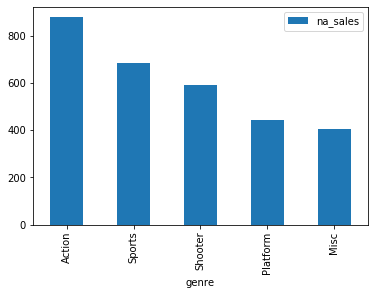

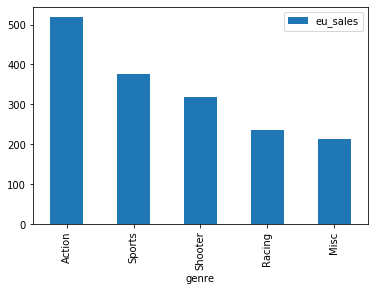

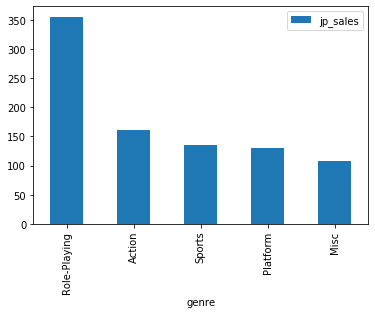

In [46]:
#выберем ТОП5 жанров игр с наибольшими продажами по регионам и построим по ним графики
columns_list = ['na_sales', 'eu_sales', 'jp_sales']
for col in columns_list:
    top_genre = games.pivot_table(index='genre', values=col, aggfunc='sum').nlargest(5, col)
    top_genre.plot(kind='bar');
    top_genre['ratio'] = (top_genre[col] / top_genre[col].sum()).round(2)*100
    display(top_genre.nlargest(5, col))

В Северной Америке и Европе полностью совпадают первые ТОП3 жанра, это экшн, спорт и шутеры.
<br>У Японии другии предпочтения, где значительно лидирует с долей 40% жанр ролевых игр, далее уже идут экшн и спорт.

### Рейтинг ESRB

Рейтинги ESRB (https://www.esrb.org/ratings-guide/):

1. E - от 6 лет
2. E10+ - от 10 лет
3. T - от 13 лет
4. M - от 17 лет

,na_sales,ratio
rating,,
E,1292.99,29.0
no rating,1240.68,28.0
T,759.75,17.0
M,748.48,17.0
E10+,353.32,8.0


,eu_sales,ratio
rating,,
E,710.25,29.0
no rating,613.30,25.0
M,483.97,20.0
T,427.03,18.0
E10+,188.52,8.0


,jp_sales,ratio
rating,,
no rating,841.93,65.0
E,198.11,15.0
T,151.40,12.0
M,64.24,5.0
E10+,40.20,3.0


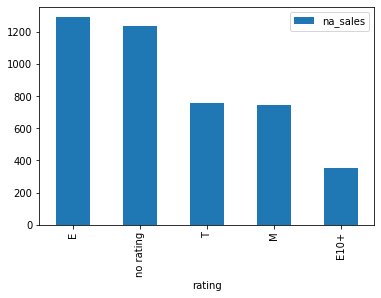

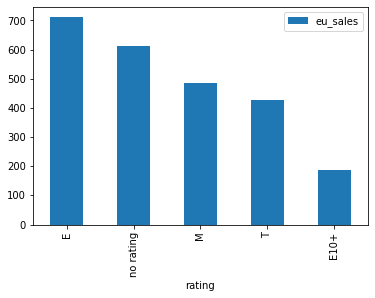

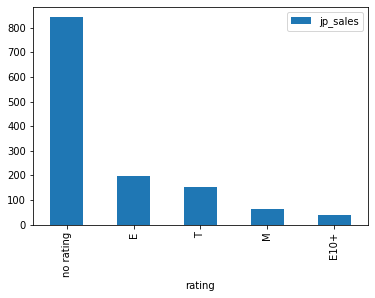

In [47]:
# сгруппируем данные по рейтингам по регионам и построим по ним графики
columns_list = ['na_sales', 'eu_sales', 'jp_sales']
for col in columns_list:
    rating = games.pivot_table(index='rating', values=col, aggfunc='sum').nlargest(5, col)
    rating.plot(kind='bar');
    rating['ratio'] = (rating[col] / rating[col].sum()).round(2)*100
    display(rating.nlargest(5, col))
                   

Продажи по рейтингу ESRB по регионам Северной Америки и Европы практически не отличаются. В Японии игры с рейтингом от 17 лет имеют намного меньше продажи, чем в других регионах.

### Вывод

Мы изучили продажи игр в зависимости от региона и можем выделить следующее:
- предпочтения пользователей Северной Америки и Европы совпадают - приставки PS и Xbox, жанры - экш и спорт.
- у пользователей Японии (в виду своего менталитета) и предпочтения в играх, как и в платформах отличаются. Предпочтение отдается приставкам Nintendo и жанрам ролевых игр.

## Проверка гипотез

для проверки предлагаются следующие гипотезы:
- средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

### Гипотеза 1 - рейтинги Xbox One и PC одинаковые

Гипотеза №1:

нулевая гипотеза `𝐻0`  — средние пользовательские рейтинги платформ Xbox One и PC одинаковые

альтернативная гипотеза `𝐻1`  — средние пользовательские рейтинги платформ Xbox One и PC различаются

`alpha` примем равную 5%

In [48]:
# создадим две новые таблицы с пользовательским рейтингом по платформам
games.dropna(subset=['user_score'], inplace=True)
xbox = games.query('platform == "XOne"')['user_score']
pc = games.query('platform == "PC"')['user_score']

alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(xbox, pc)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.3896435533548819e-05
Отвергаем нулевую гипотезу


In [49]:
xbox_pc = games.query('platform == "XOne" or platform == "PC"')
xbox_pc.pivot_table(index='platform', values='user_score', aggfunc=['mean','median']).round(1)

,mean,median
,user_score,user_score
platform,,
PC,7.1,7.5
XOne,6.5,6.8


Средние пользовательские рейтинги платформ Xbox One и PC все же отличаются, PC несколько выигрывает у XOne

### Гипотеза 2 - рейтинги жанров Action и Sports

Гипотеза №2:

нулевая гипотеза `𝐻0`  — средние пользовательские рейтинги жанров Action и Sports одинаковые

альтернативная гипотеза `𝐻1`  — средние пользовательские рейтинги жанров Action и Sports разные

`alpha` примем равную 5%

In [50]:
# создадим две новые таблицы с пользовательским рейтингом по жанрам

action = games.query('genre == "Action"')['user_score']
sports = games.query('genre == "Sports"')['user_score']

alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу


results = st.ttest_ind(action, sports)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.10406951359049141
Не получилось отвергнуть нулевую гипотезу


In [51]:
g_games = games.query('genre == "Action" or genre == "Sports"')
g_games.pivot_table(index='genre', values='user_score', aggfunc=['mean','median']).round(2)

,mean,median
,user_score,user_score
genre,,
Action,7.05,7.4
Sports,6.96,7.4


Cредние пользовательские рейтинги жанров Action и Sports незначительно отличаются, а вот значения по медиане совпадают

### Вывод

Проверили 2 гипотезы и установили, что:
- пользовательские рейтинги по платформам Xbox one и PC отличаются
- пользовательские рейтинги по жанрам Action и Sports одинаковые

## Выводы

**В ходе проекта мы сделали следующее:**
1. изучили набор данных, проверили его на ошибки
2. внесли корректировки в данные (изменили типы, заполнили пропуски, исправили стиль заголовков, удалили 2 неизвестные игры)
3. посчитали суммарные продажи по всем регионам
4. выделили ТОП10 самых продаваемых платформ, проанализировали продажи в зависимости от рейтингов и жанров
5. рассмотрели ТОП5 платформ и жанров игр по регионам и выделили предпочтения каждого
6. проверили две гипотезы по двум платформам и 2м жанрам

**В итоге можно сделать финальный вывод, что:**
- объем рынка игровой индустрии по итогам 2016 года можно оценить в размере продаж 130 млн.копий, в то время как в докризисный год 2008 продажи составили 672 млн.копий. Падение рынка в 5 раз.
- наиболее продаваемыми платформами на рынке (мировыми лидерами) являются PS (и были на горизонте анализа), и Xbox, а жанр игр - Action, на 2м место - Sports (с одинаковым пользовательским рейтингом по данным жанрам).
- если рассматривать отдельно восточный регион продаж, то там нужно ориентироваться на платформу Nintendo и жанры ролевых игр.
- на продажи платформ могут влиять рейтинги критиков, в то время как влияние обычных пользователей практически отсутствует
- текущими лидерами на рынке игровых платформ выпущенными в 2013 году являются PS4 и XOne с общими продажами за 4 года 314 и 159 млн.проданных копий.
- на рынке игровых платформ сейчас не яркие времена, продажи падали с 2009 года и падают до сих пор, что связано как с кризисными явлениями, и тут игровая индустрия уходит на второй план, так и с трендом перехода пользователей на мобильные устройства (смартфоны, планшеты), где стоимость игр в разы ниже, чем на приставках. В 2017 году каких-то кардинальных изменений не прогнозируется в платформенной игровой индустрии.